In [1]:
import os
import time
import torch
import math
import torchvision
from torchvision import transforms as transforms
from torch import nn
from torch.nn import functional as F
from math import cos,pi

import matplotlib.pyplot as plt
import numpy as np
import random

torch.cuda.empty_cache()

In [2]:
torch.cuda.is_available()

True

In [3]:
# torch.manual_seed(17)

# class HaS(object): 
# #     def __init__(self):
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         # possible grid size, 0 means no hiding
#         grid_size=3

#         # hiding probability
#         hide_prob = 0.1
 
#         # randomly choose one grid size
# #         grid_size= grid_sizes[random.randint(0,len(grid_sizes)-1)]

#         # hide the patches
#         if(grid_size>0):
#              for x in range(0,wd,grid_size):
#                  for y in range(0,ht,grid_size):
#                      x_end = min(wd, x+grid_size)  
#                      y_end = min(ht, y+grid_size)
#                      if(random.random() <=  hide_prob):
#                            img_[x:x_end,y:y_end,:]=0

#         return img_
    
# torch.manual_seed(17)

        
# class HideEdge(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[x_end:,y_end:,:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:hide_size,:hide_size,:]=0
# #         img_[x_end:,:,:]=0
# #         img_[:,y_end:,:]=0
# #         img_[:hide_size,:,:]=0
# #         img_[:,:hide_size,:]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_

   
# class Hide_after_Norm(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img_):
#         # get width and height of the image
# #         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[1]
#         ht = s[2]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size
        
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[:,x_end:,y_end:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:,:hide_size,:hide_size]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_
    
    

# # torch.cuda.manual_seed(17) # for GPU
# aug_train = transforms.Compose([
#     transforms.RandomHorizontalFlip(), # 水平翻转
# #     torchvision.transforms.CenterCrop(26),
# #     HideEdge(),
#     torchvision.transforms.RandomRotation(15),
# #     torchvision.transforms.CenterCrop(28),
#     # transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5), # color aug
# #     transforms.RandomCrop(32, padding=4), # 裁剪
#     # transforms.RandomResizedCrop((32,32),scale=(0.1,1),ratio=(0.5,2))
# #     hide_patch(),
# #     HaS(),
# #     HideEdge(2),
#     transforms.ToTensor(),
# #     Norm(2),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)),# normalization
#     Hide_after_Norm(2)
#     ])

# aug_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)), # normalization
#     Hide_after_Norm(2)
#     ])

# trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)
# # testdata = torchvision.datasets.CIFAR10('./CIFAR10',train=False,download=True,transform=transforms.ToTensor())
# # print(len(trainingdata),len(testdata))

In [4]:
torch.manual_seed(17)
torch.cuda.manual_seed_all(17)

aug_train = transforms.Compose([
    transforms.RandomCrop(32,padding=4,padding_mode='reflect'),
    transforms.RandomHorizontalFlip(), # 水平翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

aug_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)

Files already downloaded and verified


In [5]:
def load_data(is_train,aug,batch_size):
    dataset = torchvision.datasets.CIFAR10('./CIFAR10',train=is_train,download=True,transform=aug)
    dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train)
    return dataloader

batch_size = 128 # param
trainDataLoader = load_data(is_train=True,aug=aug_train,batch_size=batch_size)
testDataLoader = load_data(is_train=False,aug=aug_test,batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) 6


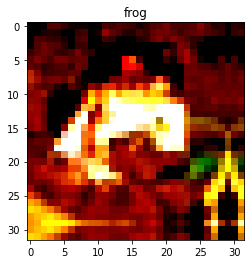

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

image,label = trainingdata[0]
print(image.shape, label)

%matplotlib inline
plt.imshow(image.numpy().transpose(1,2,0))
plt.title(str(classes[label]))
plt.show()

In [7]:
class BasicBlock(nn.Module):

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        if in_planes == 64:
            self.conv1 = nn.Conv2d(
                in_planes, planes, kernel_size=4, stride=stride, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)
        else:
            self.conv1 = nn.Conv2d(
                in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if in_planes == 64:
             self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=2, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
                )
        elif stride != 1 or in_planes != planes:
            if in_planes == 128:
                self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
                )
            else:
                self.shortcut = nn.Sequential(
                    nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
                )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out



class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(1024, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
#         print(x.shape)
        out = F.relu(self.bn1(self.conv1(x)))
#         print(out.shape)
        out = self.layer1(out)
#         print(out.shape)
        out = self.layer2(out)
#         print(out.shape)
        out = self.layer3(out)
#         print(out.shape)
#         out = self.layer4(out)
        out = F.avg_pool2d(out, 3)
#         print(out.shape)
        out = out.view(out.size(0), -1)
#         print(out.shape)
        out = self.linear(out)
        return out
    
    def init_weights(self):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):
                nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu') # weight initialization
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.BatchNorm2d):
                nn.init.constant_(m.weight,1)
                nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,std=1e-3)
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)

def project1_model():
#     return ResNet(BasicBlock, [2, 2, 2, 2])
    return ResNet(BasicBlock, [3, 3, 3])

# model1 = nn.Sequential(project1_model(), nn.AdaptiveAvgPool2d((1,1)), nn.Flatten(), nn.Linear(512, 10)).cuda()
model1 = project1_model().cuda()
model1.init_weights()

In [8]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    # torch.numel() returns number of elements in a tensor

print(count_parameters(model1))

4552906


In [9]:
# X = torch.rand(size=(1, 3, 32, 32)).cuda()
# for layer in model1:
#   X = layer(X)
#   print(layer.__class__.__name__,'output shape:\t', X.shape)

In [10]:
def adjust_learning_rate(optimizer, current_epoch,max_epoch,lr_min=0,lr_max=0.1,warmup=True):
    warmup_epoch = 10 if warmup else 0
    if current_epoch < warmup_epoch:
        lr = lr_max * current_epoch / warmup_epoch
    else:
        lr = lr_min + (lr_max-lr_min)*(1 + cos(pi * (current_epoch - warmup_epoch) / (max_epoch - warmup_epoch))) / 2
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [11]:
num_epochs = 500 # param
epoch_start = 0
path = 'batch_128_lr_0.8_no_crop_kernel_4_avg_3.pt'

train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

Loss = torch.nn.CrossEntropyLoss()

lr = 0.8
lr_min=0.001
momentum = 0.9
nesterov = True
optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=momentum,nesterov=nesterov)



if os.path.exists(path):
    checkpoint = torch.load(path)
    print('Read model from checkpoint')
    model1.cuda().load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch_start = checkpoint['epoch']
    Loss = checkpoint['Loss']
    train_loss_history = checkpoint['train_loss_history']
    test_loss_history = checkpoint['test_loss_history']
    train_accuracy_history = checkpoint['train_accuracy_history']
    test_accuracy_history = checkpoint['test_accuracy_history']
    print('Restart from epoch',epoch_start)
    

for epoch in range(epoch_start+1, num_epochs+1):
    timestart = time.time()

    train_loss = 0.0
    test_loss = 0.0
    train_accuracy = 0.0
    test_accuracy = 0.0

    for i, data in enumerate(trainDataLoader):
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        predicted_output = model1.cuda()(images)
        fit = Loss(predicted_output,labels)
        fit.backward()
        adjust_learning_rate(optimizer=optimizer,current_epoch=epoch,max_epoch=num_epochs,lr_min=lr_min,lr_max=lr,warmup=True)
        optimizer.step()
        train_loss += fit.item()
        train_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()

    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            predicted_output = model1.cuda()(images)
            fit = Loss(predicted_output,labels)
            test_loss += fit.item()
            test_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()


    train_loss = train_loss/len(trainDataLoader)
    test_loss = test_loss/len(testDataLoader)
    train_accu = train_accuracy/len(trainDataLoader)
    test_accu = test_accuracy/len(testDataLoader)
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    train_accuracy_history.append(train_accu)
    test_accuracy_history.append(test_accu)
    print('Epoch %s, Train loss %s, Test loss %s, Train accuracy %s, Test accuracy %s, Cost %s s'%(epoch,
                                                                                                   train_loss,test_loss,
                                                                                                   train_accu,test_accu,
                                                                                                   time.time()-timestart))

    if epoch % 5 == 0 and epoch != 0:
        torch.save({'epoch':epoch,
          'model_state_dict':model1.cuda().state_dict(),
          'optimizer_state_dict':optimizer.state_dict(),
          'Loss':Loss,
          'train_loss_history':train_loss_history,
          'test_loss_history':test_loss_history,
          'train_accuracy_history':train_accuracy_history,
          'test_accuracy_history':test_accuracy_history},path)
        print('Model saved in epoch %s'%(epoch))

Read model from checkpoint
Restart from epoch 315
Epoch 316, Train loss 0.00020387713805305799, Test loss 0.6074785522267788, Train accuracy 99.99400575447571, Test accuracy 93.42365506329114, Cost 57.008063316345215 s
Epoch 317, Train loss 0.00011033370101607067, Test loss 0.6055116005053248, Train accuracy 99.99400575447571, Test accuracy 93.6807753164557, Cost 56.920806646347046 s
Epoch 318, Train loss 0.0001625048697506267, Test loss 0.6147816368862044, Train accuracy 99.99800191815856, Test accuracy 93.53243670886076, Cost 56.85256838798523 s
Epoch 319, Train loss 0.0002032424464978183, Test loss 0.6063037482620794, Train accuracy 99.99000959079284, Test accuracy 93.63132911392405, Cost 56.86383771896362 s
Epoch 320, Train loss 0.00020516434061312134, Test loss 0.5974135637943503, Train accuracy 99.99600383631713, Test accuracy 93.49287974683544, Cost 56.85054969787598 s
Model saved in epoch 320
Epoch 321, Train loss 0.00015458107812947678, Test loss 0.6025187772097467, Train accu

Epoch 364, Train loss 3.5946459736803725e-05, Test loss 0.6268336398031893, Train accuracy 100.0, Test accuracy 93.57199367088607, Cost 56.895713567733765 s
Epoch 365, Train loss 4.7121037091157014e-05, Test loss 0.6260530438179834, Train accuracy 100.0, Test accuracy 93.56210443037975, Cost 56.887943267822266 s
Model saved in epoch 365
Epoch 366, Train loss 1.5096684562385074e-05, Test loss 0.625920886881178, Train accuracy 100.0, Test accuracy 93.54232594936708, Cost 56.95835518836975 s
Epoch 367, Train loss 6.216634493107707e-05, Test loss 0.6286420409060731, Train accuracy 99.99800191815856, Test accuracy 93.59177215189874, Cost 57.00713491439819 s
Epoch 368, Train loss 3.0244979980984782e-05, Test loss 0.6257219568743736, Train accuracy 99.99800191815856, Test accuracy 93.54232594936708, Cost 56.98823833465576 s
Epoch 369, Train loss 6.97654401153031e-05, Test loss 0.6265981921666786, Train accuracy 99.99800191815856, Test accuracy 93.56210443037975, Cost 56.9945969581604 s
Epoch 

Epoch 414, Train loss 2.2170234187403017e-05, Test loss 0.620969482520713, Train accuracy 100.0, Test accuracy 93.57199367088607, Cost 56.89170980453491 s
Epoch 415, Train loss 1.4147009172383671e-05, Test loss 0.6209879451065878, Train accuracy 100.0, Test accuracy 93.5818829113924, Cost 56.869415044784546 s
Model saved in epoch 415
Epoch 416, Train loss 1.904439364430005e-05, Test loss 0.6220577487226906, Train accuracy 100.0, Test accuracy 93.56210443037975, Cost 56.91670560836792 s
Epoch 417, Train loss 3.073689727319914e-05, Test loss 0.6216649283430998, Train accuracy 100.0, Test accuracy 93.5818829113924, Cost 56.88713884353638 s
Epoch 418, Train loss 1.0974009410828664e-05, Test loss 0.6216422258109986, Train accuracy 100.0, Test accuracy 93.5818829113924, Cost 56.92387843132019 s
Epoch 419, Train loss 1.8289408176329742e-05, Test loss 0.6212155641634253, Train accuracy 100.0, Test accuracy 93.59177215189874, Cost 56.88954758644104 s
Epoch 420, Train loss 5.2618295163163317e-05

Epoch 465, Train loss 2.6668863151100974e-05, Test loss 0.6188626654351814, Train accuracy 100.0, Test accuracy 93.56210443037975, Cost 56.89844059944153 s
Model saved in epoch 465
Epoch 466, Train loss 1.9456118186685324e-05, Test loss 0.6188160205094875, Train accuracy 100.0, Test accuracy 93.57199367088607, Cost 56.95369577407837 s
Epoch 467, Train loss 1.5773406652843085e-05, Test loss 0.6188411780786288, Train accuracy 100.0, Test accuracy 93.56210443037975, Cost 56.9174644947052 s
Epoch 468, Train loss 2.0972188216576346e-05, Test loss 0.6188492044759325, Train accuracy 100.0, Test accuracy 93.57199367088607, Cost 56.878751039505005 s
Epoch 469, Train loss 4.56147396469727e-05, Test loss 0.6186082853310848, Train accuracy 99.99800191815856, Test accuracy 93.5818829113924, Cost 56.88705801963806 s
Epoch 470, Train loss 1.3327860132099566e-05, Test loss 0.6185676761537413, Train accuracy 100.0, Test accuracy 93.5818829113924, Cost 56.89182996749878 s
Model saved in epoch 470
Epoch 

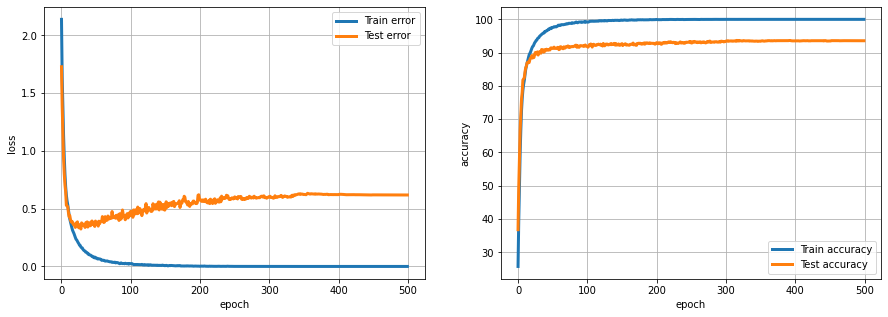

In [12]:
# num_epochs = 553 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [13]:
print('Accuracy:',sum(test_accuracy_history[-5:])/5)

Accuracy: 93.5759493670886
